In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [8]:
df = pd.read_csv('Listings_sin_atipicos.csv')
df= df.drop(['Unnamed: 0.1'], axis=1)
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,days_since_first,months_since_first
0,https://www.airbnb.com/rooms/35797,2025-06-26,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,...,4.90,4.90,4.80,1.0,1.0,0.0,0.0,0.00,887.0,29.200000
1,https://www.airbnb.com/rooms/44616,2025-07-01,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,No data,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,...,4.78,4.98,4.47,9.0,4.0,2.0,0.0,0.39,4983.0,163.857534
2,https://www.airbnb.com/rooms/56074,2025-07-01,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,https://www.airbnb.com/users/show/265650,Maris,2010-10-19,...,4.94,4.76,4.79,1.0,1.0,0.0,0.0,0.48,887.0,29.200000
3,https://www.airbnb.com/rooms/67703,2025-07-01,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No data,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,Nicholas,2011-01-04,...,4.92,4.98,4.92,2.0,2.0,0.0,0.0,0.30,4975.0,163.594521
4,https://www.airbnb.com/rooms/70644,2025-07-01,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,Trisha,2010-08-24,...,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.81,4886.0,160.668493


In [9]:
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=entire_df)

NameError: name 'entire_df' is not defined

In [ ]:
Vars_Indep= entire_df[['host_acceptance_rate']]
Var_Dep= entire_df['host_response_rate']

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.06474282]),
 'rank_': 1,
 'singular_': array([238.51986821]),
 'intercept_': np.float64(92.83259943487374)}

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---


In [ ]:
model.score(Vars_Indep,Var_Dep)

0.0013819458666741724

In [ ]:
y_pred= model.predict(X=df[['host_acceptance_rate']])
y_pred

array([99.24213855, 98.724196  , 99.30688137, ..., 99.11265291,
       99.30688137, 99.24213855], shape=(26401,))

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

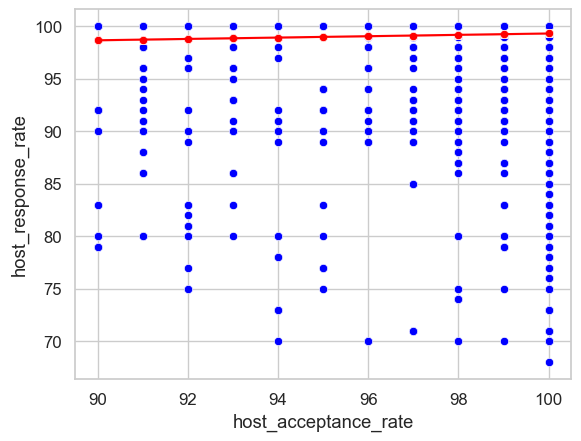

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=df)
sns.lineplot(x='host_acceptance_rate', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0013819458666741724

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.037174532501084295)

In [ ]:
df_numeric = entire_df.drop(entire_df.select_dtypes(include=['object']).columns, axis=1)
df_numeric = df_numeric.drop(['Unnamed: 0.1'], axis=1)
df_numeric = df_numeric.drop(['Unnamed: 0'], axis=1)  

In [ ]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df_numeric.corr()
Corr_Factors

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,days_since_first,months_since_first
id,1.000000,NaN,0.408697,-0.031507,0.015034,0.040249,0.071915,-0.000613,0.000013,-0.019363,...,-0.002627,0.033296,0.008148,0.054543,0.003285,0.003196,NaN,0.051405,-0.814746,-0.814741
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.408697,NaN,1.000000,-0.016363,0.057970,0.050929,0.063516,-0.021970,-0.010191,-0.078330,...,-0.058494,-0.062077,-0.045910,0.073770,0.028542,-0.027033,NaN,0.009857,-0.395061,-0.395058
host_response_rate,-0.031507,NaN,-0.016363,1.000000,0.037175,-0.022665,-0.006630,0.030518,0.006055,0.013420,...,0.097545,0.020424,0.031833,-0.026456,0.009561,-0.036516,NaN,0.050079,0.020927,0.020926
host_acceptance_rate,0.015034,NaN,0.057970,0.037175,1.000000,0.064754,0.030358,0.014272,-0.033886,-0.005040,...,-0.022839,0.006277,-0.024998,0.045500,0.019509,-0.036506,NaN,0.019687,-0.026407,-0.026405
host_total_listings_count,0.040249,NaN,0.050929,-0.022665,0.064754,1.000000,0.064974,0.014447,-0.046185,-0.044557,...,-0.099766,-0.014844,-0.115097,0.598360,0.406258,0.158096,NaN,0.028693,-0.026503,-0.026505
latitude,0.071915,NaN,0.063516,-0.006630,0.030358,0.064974,1.000000,0.019869,0.011157,-0.031885,...,-0.028701,-0.046533,-0.004596,0.092494,0.035997,-0.038566,NaN,0.090544,-0.059827,-0.059828
longitude,-0.000613,NaN,-0.021970,0.030518,0.014272,0.014447,0.019869,1.000000,-0.011532,-0.091805,...,0.009877,-0.011650,0.026064,0.014116,0.004595,0.004587,NaN,0.087497,0.017307,0.017306
accommodates,0.000013,NaN,-0.010191,0.006055,-0.033886,-0.046185,0.011157,-0.011532,1.000000,0.394609,...,0.008799,-0.008555,0.063950,-0.054311,-0.048810,-0.049030,NaN,0.057889,-0.007736,-0.007738
bathrooms,-0.019363,NaN,-0.078330,0.013420,-0.005040,-0.044557,-0.031885,-0.091805,0.394609,1.000000,...,0.032801,0.102307,0.091097,-0.040293,-0.049950,-0.036385,NaN,-0.005197,-0.000496,-0.000495


In [ ]:
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,days_since_first,months_since_first
id,1.000000,NaN,0.408697,0.031507,0.015034,0.040249,0.071915,0.000613,0.000013,0.019363,...,0.002627,0.033296,0.008148,0.054543,0.003285,0.003196,NaN,0.051405,0.814746,0.814741
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.408697,NaN,1.000000,0.016363,0.057970,0.050929,0.063516,0.021970,0.010191,0.078330,...,0.058494,0.062077,0.045910,0.073770,0.028542,0.027033,NaN,0.009857,0.395061,0.395058
host_response_rate,0.031507,NaN,0.016363,1.000000,0.037175,0.022665,0.006630,0.030518,0.006055,0.013420,...,0.097545,0.020424,0.031833,0.026456,0.009561,0.036516,NaN,0.050079,0.020927,0.020926
host_acceptance_rate,0.015034,NaN,0.057970,0.037175,1.000000,0.064754,0.030358,0.014272,0.033886,0.005040,...,0.022839,0.006277,0.024998,0.045500,0.019509,0.036506,NaN,0.019687,0.026407,0.026405
host_total_listings_count,0.040249,NaN,0.050929,0.022665,0.064754,1.000000,0.064974,0.014447,0.046185,0.044557,...,0.099766,0.014844,0.115097,0.598360,0.406258,0.158096,NaN,0.028693,0.026503,0.026505
latitude,0.071915,NaN,0.063516,0.006630,0.030358,0.064974,1.000000,0.019869,0.011157,0.031885,...,0.028701,0.046533,0.004596,0.092494,0.035997,0.038566,NaN,0.090544,0.059827,0.059828
longitude,0.000613,NaN,0.021970,0.030518,0.014272,0.014447,0.019869,1.000000,0.011532,0.091805,...,0.009877,0.011650,0.026064,0.014116,0.004595,0.004587,NaN,0.087497,0.017307,0.017306
accommodates,0.000013,NaN,0.010191,0.006055,0.033886,0.046185,0.011157,0.011532,1.000000,0.394609,...,0.008799,0.008555,0.063950,0.054311,0.048810,0.049030,NaN,0.057889,0.007736,0.007738
bathrooms,0.019363,NaN,0.078330,0.013420,0.005040,0.044557,0.031885,0.091805,0.394609,1.000000,...,0.032801,0.102307,0.091097,0.040293,0.049950,0.036385,NaN,0.005197,0.000496,0.000495


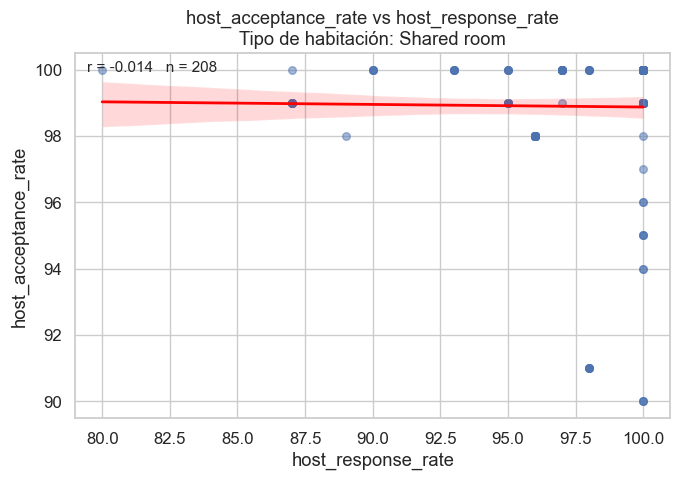

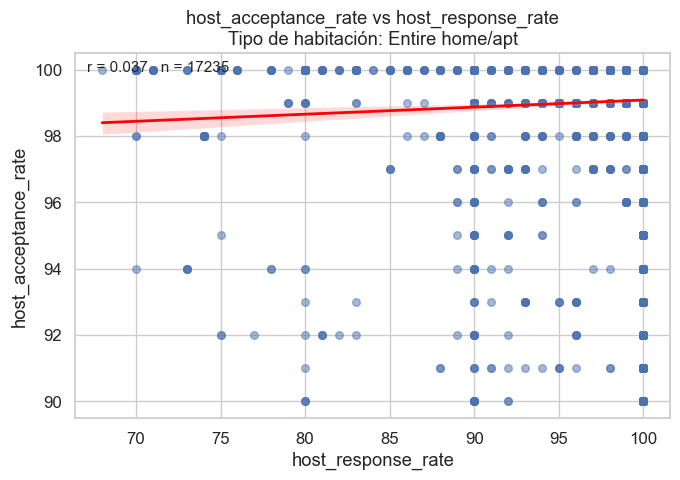

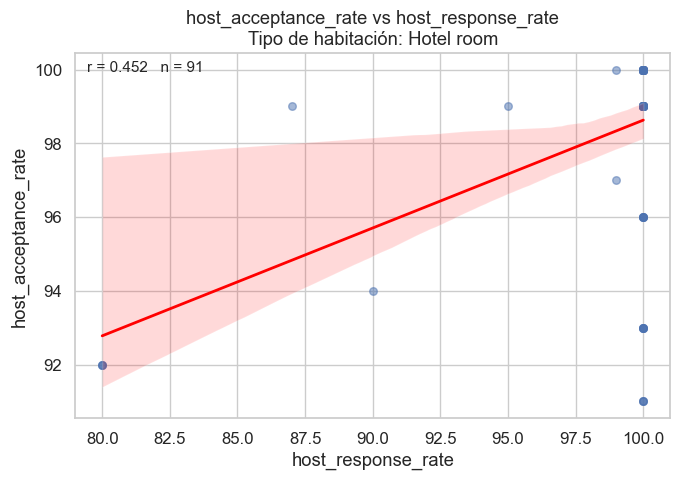

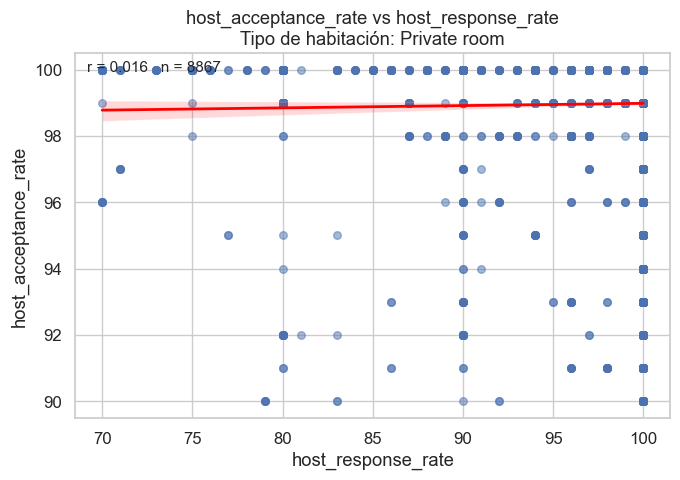

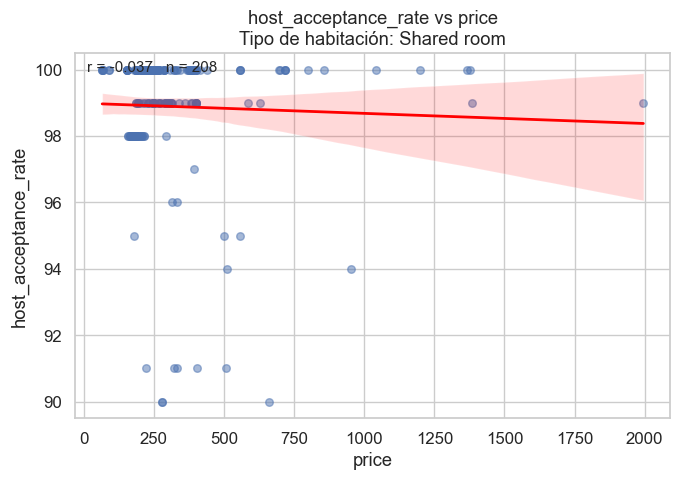

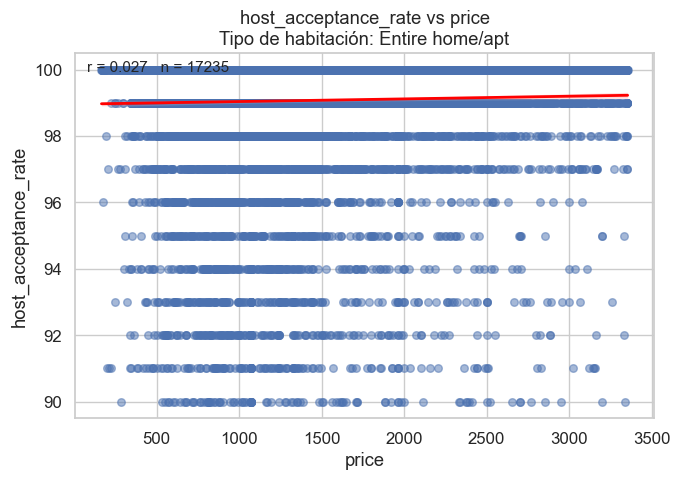

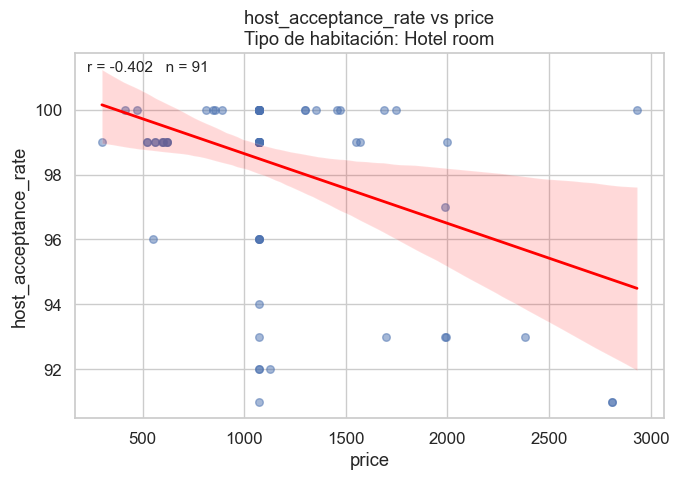

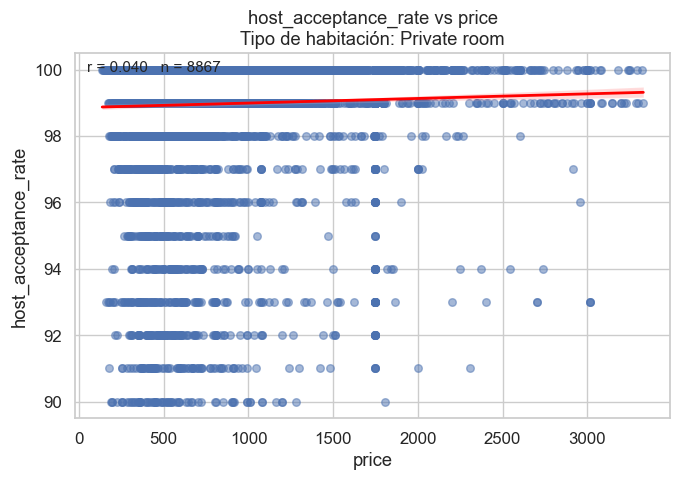

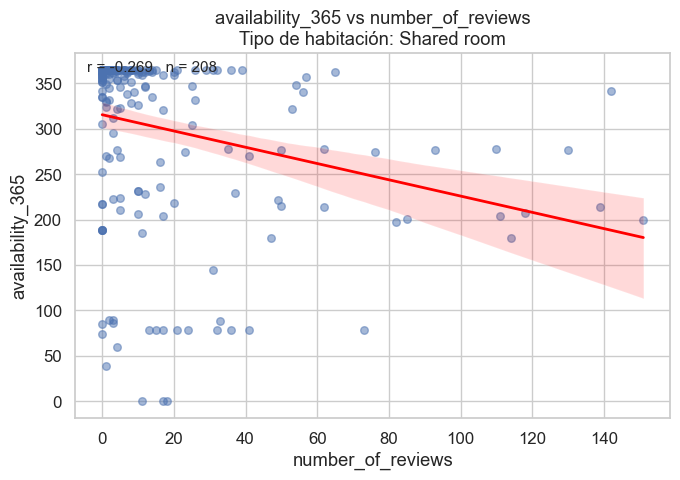

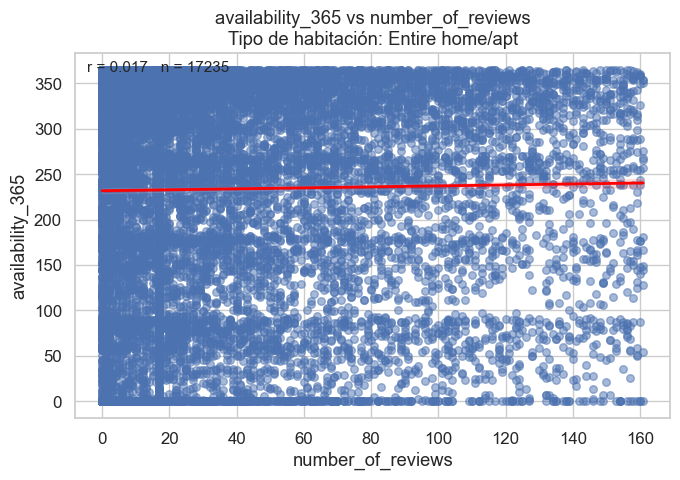

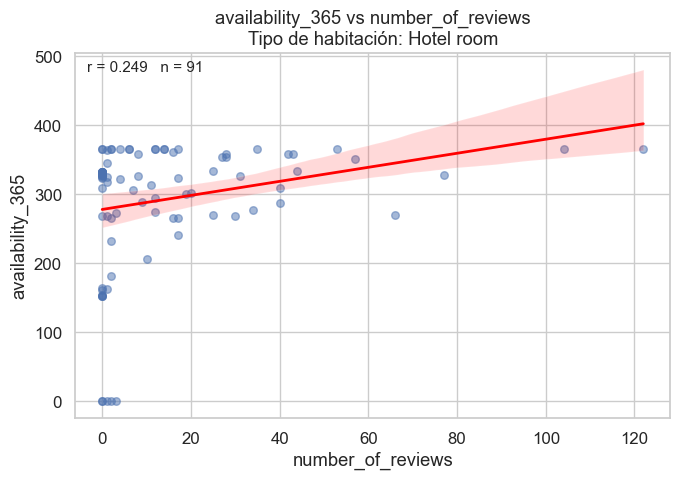

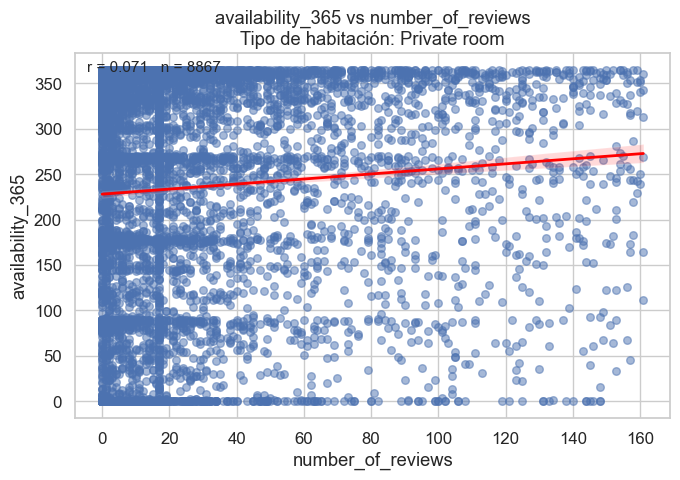

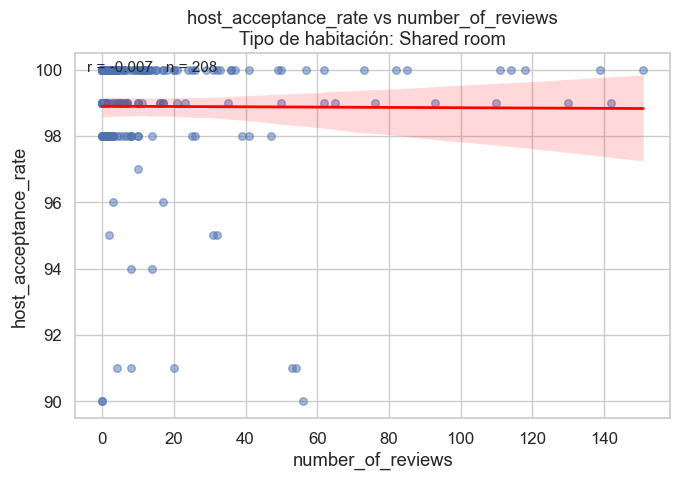

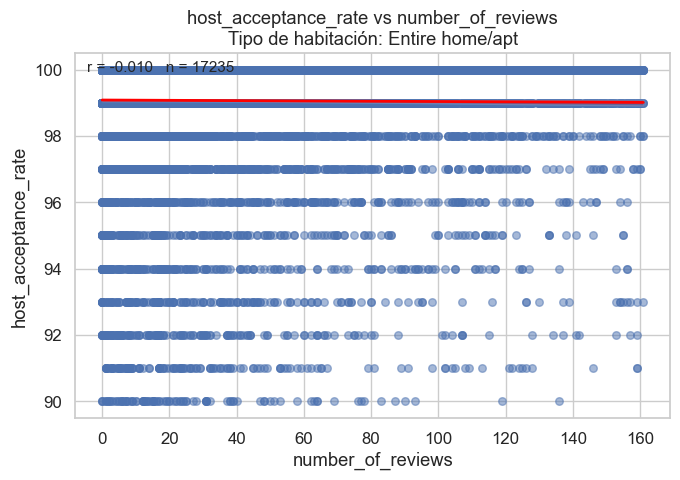

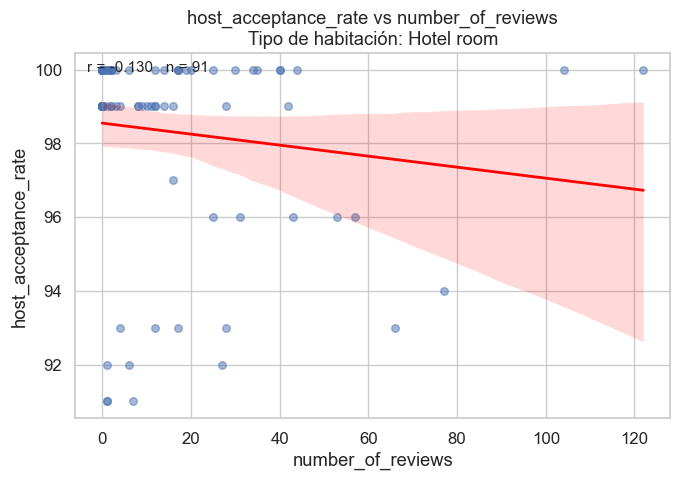

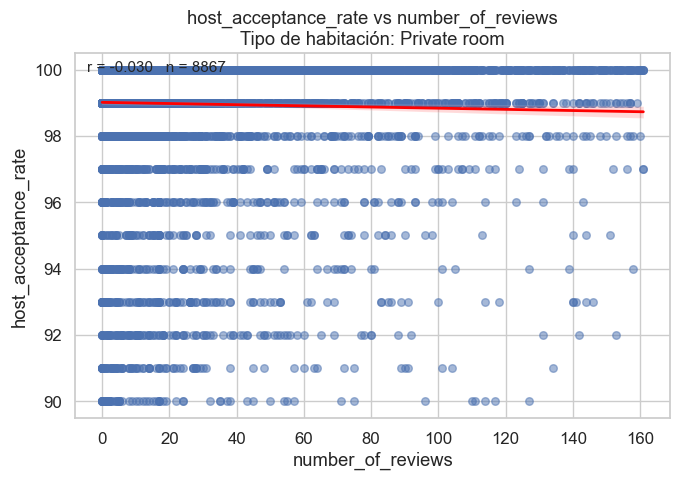

In [ ]:
pairs = [
    ("host_acceptance_rate", "host_response_rate"),
    ("host_acceptance_rate", "price"),
    ("availability_365", "number_of_reviews"),
    ("host_acceptance_rate", "number_of_reviews"),
]

# Tipos de habitación
room_types = ["Shared room", "Entire home/apt", "Hotel room", "Private room"]

sns.set(style="whitegrid", font_scale=1.1)

results = []  # para guardar resumen

for y, x in pairs:
    for rt in room_types:
        # Filtrar y limpiar
        tmp = df[df["room_type"] == rt][[x, y]].dropna()

        n = tmp.shape[0]
        if n < 3:
            print(f"⚠️ Muy pocos datos para {y} vs {x} en {rt} (n={n})")
            continue

        # Correlación de Pearson
        r = tmp[y].corr(tmp[x])  # equivalente a pandas.Series.corr (Pearson por default)

        # Guardar en resumen
        results.append({
            "pair": f"{y} vs {x}",
            "room_type": rt,
            "n": n,
            "pearson_r": r,
            "abs_r": abs(r),
        })

        # Graficar con línea de regresión
        plt.figure(figsize=(7,5))
        ax = sns.regplot(
            data=tmp, x=x, y=y,
            scatter_kws={"alpha":0.5, "s":30},
            line_kws={"color":"red", "linewidth":2}
        )
        plt.title(f"{y} vs {x}\nTipo de habitación: {rt}")
        plt.xlabel(x)
        plt.ylabel(y)

        # Anotar r y n en el gráfico (esquina superior izquierda)
        txt = f"r = {r:.3f}   n = {n}"
        # coordenadas en ejes (relativas 0..1)
        ax.text(0.02, 0.98, txt, transform=ax.transAxes, va="top", ha="left", fontsize=11)

        plt.tight_layout()
        plt.show()


In [13]:
def drop_obvious_dupes(df_num: pd.DataFrame) -> pd.DataFrame:
    cols = df_num.columns
    # 1) columnas típicas de índice exportado
    cols_to_drop = [c for c in cols if re.match(r"^Unnamed(:\s*\d+)?$", c)]
    # 2) columnas de modelo / derivadas
    for c in ["Predicciones"]:
        if c in cols: cols_to_drop.append(c)
    # 3) counts alternativos (elige uno)
    if {"host_total_listings_count", "calculated_host_listings_count"} <= set(cols):
        cols_to_drop.append("host_total_listings_count")  # deja 'calculated_host_listings_count'
    # 4) tiempos equivalentes (deja months_since_first)
    if {"days_since_first", "months_since_first"} <= set(cols):
        cols_to_drop.append("days_since_first")

    # 5) ventanas de availability: deja una representativa (ej. availability_90)
    avail_cols = [c for c in cols if re.match(r"availability_(30|60|90|365|eoy)$", c)]
    for c in avail_cols:
        if c != "availability_90":  # conserva 90; ajusta si prefieres otra
            cols_to_drop.append(c)

    # 6) mínimos/máximos muy parecidos: deja los más “interpretables”
    # mínimos
    if {"minimum_nights", "minimum_minimum_nights"} <= set(cols):
        cols_to_drop.append("minimum_minimum_nights")
    # máximos
    if {"maximum_maximum_nights", "maximum_nights_avg_ntm"} <= set(cols):
        cols_to_drop.append("maximum_maximum_nights")
    if {"minimum_maximum_nights", "maximum_nights_avg_ntm"} <= set(cols):
        cols_to_drop.append("minimum_maximum_nights")
    if {"maximum_minimum_nights", "minimum_nights_avg_ntm"} <= set(cols):
        cols_to_drop.append("maximum_minimum_nights")

    # aplica
    cols_to_drop = list(dict.fromkeys([c for c in cols_to_drop if c in cols]))  # únicos y existentes
    return df_num.drop(columns=cols_to_drop, errors="ignore"), cols_to_drop

def drop_constants(df_num: pd.DataFrame) -> pd.DataFrame:
    const = df_num.columns[df_num.nunique(dropna=True) <= 1]
    return df_num.drop(columns=list(const)), list(const)

def reduce_high_corr(df_num: pd.DataFrame, threshold: float = 0.97):
    """
    Greedy: recorre columnas; si alguna está altamente colineada (|r|>=threshold)
    con una ya 'keep', se descarta. Devuelve df reducido y lista de descartes.
    """
    corr = df_num.corr(numeric_only=True).abs()
    keep, drop = [], []
    for col in corr.columns:
        if col in drop:
            continue
        # si ya hay alguna 'keep' muy correlacionada con col -> descártala
        if any(corr.loc[col, k] >= threshold for k in keep):
            drop.append(col)
        else:
            keep.append(col)
    return df_num[keep].copy(), drop

def top_k_pairs_from_corr(corr, k=10):
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
    corr_vals = corr.where(mask)
    long_df = corr_vals.stack().reset_index()
    long_df.columns = ["var1", "var2", "pearson_r"]
    long_df["abs_r"] = long_df["pearson_r"].abs()
    return long_df.sort_values("abs_r", ascending=False).head(k)

# --- loop principal (tu parte ajustada) ---
all_tables = []
room_types = ["Shared room", "Entire home/apt", "Hotel room", "Private room"]

for rt in room_types:
    sub = df[df["room_type"] == rt]
    sub_num = sub.select_dtypes(include=[np.number]).copy()

    # 1) obvias duplicadas
    sub_num, dropped_obvious = drop_obvious_dupes(sub_num)
    # 2) constantes
    sub_num, dropped_const = drop_constants(sub_num)
    # 3) colineales (umbral configurable)
    sub_num, dropped_corr = reduce_high_corr(sub_num, threshold=0.97)

    if sub_num.shape[0] < 3 or sub_num.shape[1] < 3:
        print(f"⚠️ Pocos datos para {rt} tras limpieza (filas={sub_num.shape[0]}, cols={sub_num.shape[1]}). Se omite.")
        continue

    print(f"\n[{rt}] columnas eliminadas:")
    if dropped_obvious: print(" - Obvias: ", dropped_obvious)
    if dropped_const:  print(" - Constantes: ", dropped_const)
    if dropped_corr:   print(" - Alta colinealidad: ", dropped_corr)

    corr = sub_num.corr(numeric_only=True)
    top10 = top_k_pairs_from_corr(corr, k=10)
    top10.insert(0, "room_type", rt)
    all_tables.append(top10)

    print(f"\nTop 10 correlaciones para {rt}")
    print(top10[["var1", "var2", "pearson_r", "abs_r"]])


[Shared room] columnas eliminadas:
 - Obvias:  ['host_total_listings_count', 'days_since_first', 'availability_30', 'availability_60', 'availability_365', 'availability_eoy', 'minimum_minimum_nights', 'maximum_maximum_nights', 'minimum_maximum_nights', 'maximum_minimum_nights']
 - Constantes:  ['scrape_id', 'calculated_host_listings_count_shared_rooms']

Top 10 correlaciones para Shared room
                          var1                         var2  pearson_r  \
470  estimated_occupancy_l365d      estimated_revenue_l365d   0.934238   
427      number_of_reviews_ltm    estimated_occupancy_l365d   0.873436   
428      number_of_reviews_ltm      estimated_revenue_l365d   0.779685   
411          number_of_reviews    estimated_occupancy_l365d   0.747662   
498       review_scores_rating  review_scores_communication   0.742675   
481  estimated_occupancy_l365d            reviews_per_month   0.732185   
495       review_scores_rating       review_scores_accuracy   0.726988   
412         